In [2]:
import numpy as np
import matplotlib.pyplot as plt

from source.mesh import Mesh
from source.integrators import ElementIntegratorCollocation
from source.matrix_assembly import CollocationAssembler


%load_ext autoreload
%autoreload 2

In [15]:
# ----------------------------------------------------------------------
# 1) Create a small test mesh: 3 triangles forming a "fan" in the XY-plane
# ----------------------------------------------------------------------
# Vertices
nodes = np.array([
    [0.0, 0.0, 0.0],   # 0
    [1.0, 0.0, 0.0],   # 1
    [0.0, 1.0, 0.0],   # 2
    [1.0, 1.0, 0.5],   # 3
], dtype=float)

# Triangles (connectivity by node indices)
elements = np.array([
    [0, 1, 2],   # tri 0
    [1, 3, 2],   # tri 1
    [0, 2, 3],   # tri 2
], dtype=int)

# Dummy velocity boundary condition (not used in assembly)
vel_BC = np.zeros(nodes.shape[0])

frequency = 1000.0  # Hz

# ----------------------------------------------------------------------
# 2) Instantiate Mesh
# ----------------------------------------------------------------------
mesh = Mesh(
    mesh_nodes=nodes,
    mesh_elements=elements,
    velocity_BC=vel_BC,
    frequency=frequency,
)

# ----------------------------------------------------------------------
# 3) Create the integrator
# ----------------------------------------------------------------------
integrator = ElementIntegratorCollocation(k=mesh.k)

# ----------------------------------------------------------------------
# 4) Assemble the single-layer operator
# ----------------------------------------------------------------------
assembler = CollocationAssembler(mesh, integrator)
S = assembler.assemble(operator="S")
D = assembler.assemble(operator="D")
Kp = assembler.assemble(operator="Kp")
N = assembler.assemble(operator="N")

print("Assembled single-layer matrix S:")
print(S)
print("Shape:", S.shape)

Assembled single-layer matrix S:
[[ 0.01765426+0.01325287j -0.00348128-0.00424682j  0.00693247-0.00543364j
   0.00089044+0.00276056j]
 [-0.00284734-0.00340896j -0.00231133+0.03441626j -0.00706415+0.00219832j
   0.01082186+0.01285779j]
 [ 0.01276574+0.00300409j -0.00620239-0.00466971j -0.01215251+0.04258481j
   0.01490091+0.01103805j]
 [ 0.00327713+0.00271066j  0.00538093+0.01176405j  0.01520089+0.01345482j
  -0.01262501+0.04020267j]]
Shape: (4, 4)


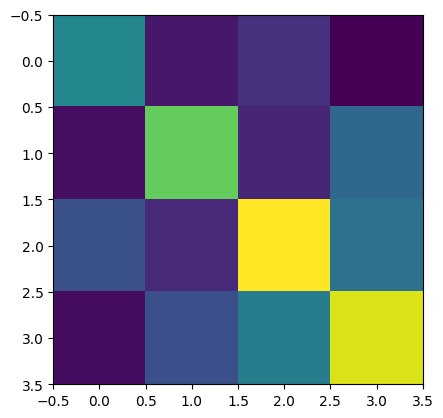

In [16]:
plt.imshow(np.abs(S), cmap='viridis')

In [18]:
D

array([[ 0.00000000e+00+0.00000000e+00j,  7.04775268e-03+1.82744158e-02j,
         2.70721287e-03+1.15102931e-02j, -1.23019006e-03+1.70886332e-03j],
       [-1.16994374e-02+2.58490235e-02j,  1.34744788e-17-6.69773277e-18j,
         8.00192242e-04-2.32893056e-03j,  1.20327132e-02+1.34692697e-02j],
       [ 0.00000000e+00+0.00000000e+00j,  1.46490930e-18-1.80028764e-18j,
         9.13939577e-18-2.87728357e-17j,  6.13051694e-19-2.85697421e-18j],
       [ 9.31939840e-03-2.80128032e-02j,  2.81599248e-03-6.65289763e-02j,
         2.81599248e-03-6.65289763e-02j, -5.07504352e-18-1.66473211e-17j]])